In [ ]:
#Required Python libraries
!pip install nltk
!pip install tensorflow




## **Artificial Neural Networks(ANN)**



An Artificial Neural Network (ANN) is a computer system inspired by how the human brain works. It's a type of machine learning model that helps computers recognize patterns, make predictions, or classify things based on input data.

Think of it like a network of "neurons" (just like the brain). Here's how it works:

* **Neurons:** These are like little units in the network. Each neuron gets some input, processes it, and passes the output to the next layer of neurons.

* **Layers:** An ANN has multiple layers. The first layer takes the raw data (like an image, sound, or text). The last layer gives the result (like the label for an image or the predicted number).


* **Hidden layers:** These layers do most of the work, processing the information through many neurons.
* **Output layer:** Gives the final result.
* **Connections:** Each neuron is connected to others, and the connections have weights. The weight determines how much influence one neuron has on another. When the input data flows through the network, the weights are adjusted to help the network make better predictions or classifications over time.

* **Learning:** The ANN "learns" by adjusting these weights through a process called training. When the network makes a mistake, the weights are updated to reduce the error. This process is repeated many times until the network gets really good at making predictions.




**Example of ANN:**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


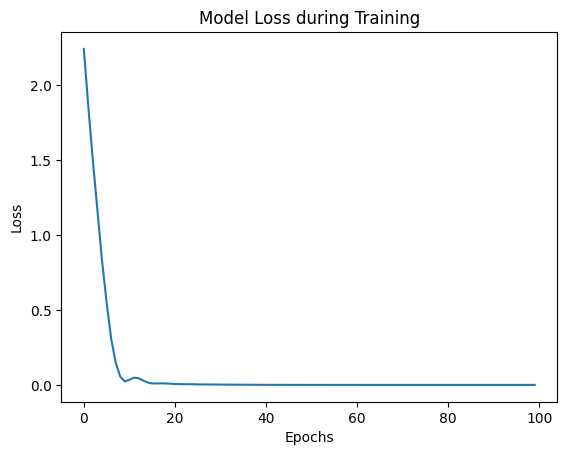

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predictions:  [[-0.9617878 ]
 [-0.92685986]
 [-0.89193225]
 [-0.8570045 ]
 [-0.82207656]]


In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Step 1: Create a simple dataset
# Let's generate data using the equation y = 2x + 1
X = np.linspace(-1, 1, 100)
# 100 data points from -1 to 1

y = 2 * X + 1  # The target output is 2x + 1



# Step 2: Build a simple model
model = Sequential()
model.add(Dense(10, input_dim=1, activation='relu'))  # 1 input dimension, 10 neurons in the hidden layer
model.add(Dense(1))  # 1 output (regression task)




# Step 3: Compile the model with the Mean Squared Error loss function
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')


# Step 4: Train the model
history = model.fit(X, y, epochs=100, verbose=0)

# Step 5: Plot the training loss
plt.plot(history.history['loss'])
plt.title('Model Loss during Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Step 6: Make a prediction
predictions = model.predict(X)

# You can print or visualize the predictions
print("Predictions: ", predictions[:5])  # Print the first 5 predictions



## **Convolutional Neural Networks(CNN)**





**Explanation:**
A Convolutional Neural Network (CNN) is a special type of Artificial Neural Network (ANN) that's really good at working with images and videos. It's designed to automatically recognize patterns like edges, shapes, and objects in visual data.

Here’s a simple breakdown of how it works:

* **Input Layer:**

    **Purpose:** This is where the raw data (such as an image) enters the network. The input is typically an image represented as a grid of pixel values (e.g., 28x28 or 224x224 pixels).
* **Convolutional Layer:**

    **Purpose:** This layer applies filters (kernels) to the input image to extract features like edges, textures, and shapes. Each filter scans the image in small patches (called convolutions), producing feature maps that highlight important patterns in the image.
    **Role:** It detects low-level features in the early layers (like edges) and more complex features (like textures or parts of objects) in deeper layers.
* **Max Pooling Layer:**

    **Purpose:** The pooling layer reduces the size of the feature maps, making the network more efficient by lowering the number of parameters. It performs operations like max pooling, which selects the maximum value from small regions (e.g., a 2x2 grid), to retain only the most important information.
    **Role:** Reduces computational complexity and helps make the network invariant to small changes or translations in the input image.

* **Dense (Fully Connected) Layer:**

    **Purpose:** After feature extraction and dimensionality reduction, the fully connected layer combines all the features learned from the previous layers. This layer consists of neurons that connect to every neuron in the previous layer.
    **Role:** It processes the learned features to make decisions (like classifying the image). The final layer in this section will prepare the network’s output based on the learned patterns.
* **Output Layer:**

    **Purpose:** The final layer of the CNN, where the network gives its prediction (e.g., the label of the object in the image). In a classification task, it typically uses a softmax function to output probabilities for each class.
    **Role:** It provides the final classification result (for example, a label like "cat" or "dog").

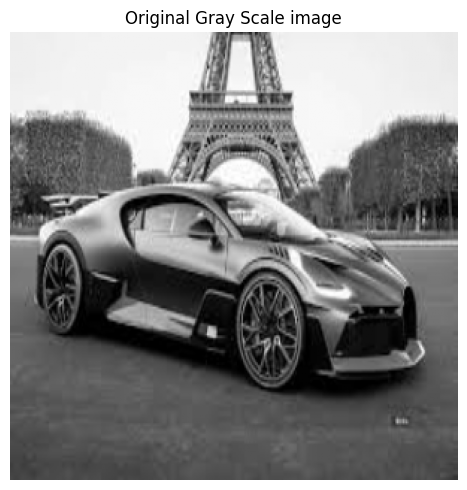

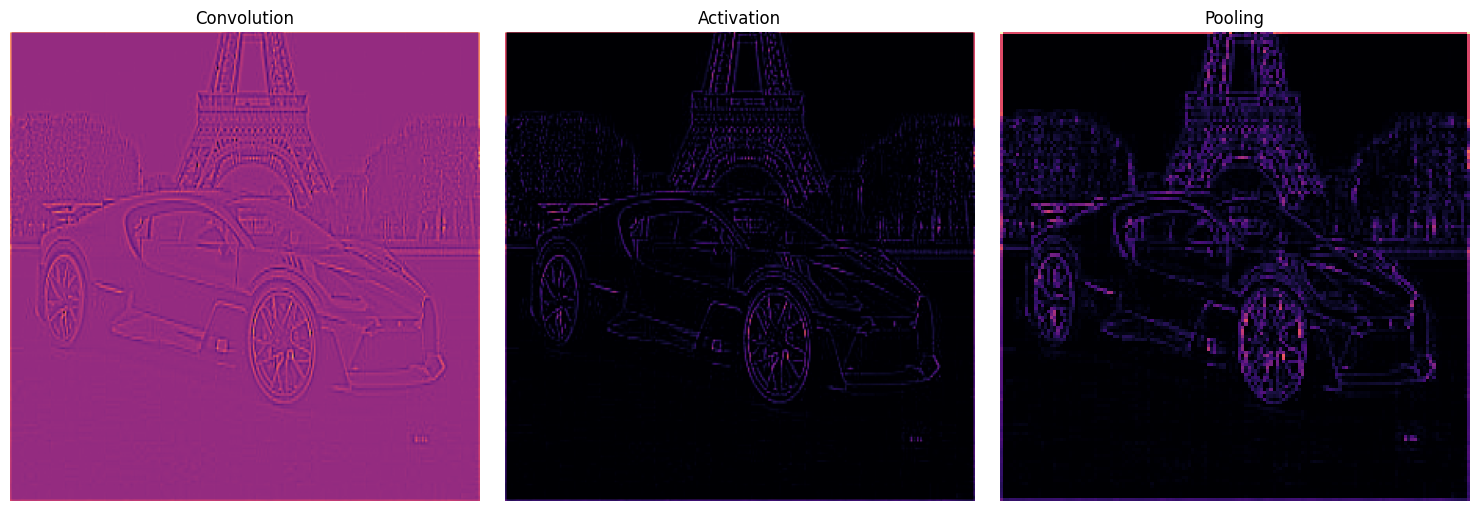

In [3]:
# import the necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from itertools import product

# set the param
plt.rc('figure', autolayout=True)
plt.rc('image', cmap='magma')

# define the kernel 3x3
kernel = tf.constant([[-1, -1, -1],
                    [-1,  8, -1],
                    [-1, -1, -1],
                   ])

# load the image
#upload the image to this path /content/download.jfif
image = tf.io.read_file('/content/download.jfif')
image = tf.io.decode_jpeg(image, channels=1)
image = tf.image.resize(image, size=[300, 300])

# plot the image
img = tf.squeeze(image).numpy()
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original Gray Scale image')
plt.show();


# Reformat
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

# convolution layer
conv_fn = tf.nn.conv2d

image_filter = conv_fn(
    input=image,
    filters=kernel,
    strides=1, # or (1, 1)
    padding='SAME',
)

plt.figure(figsize=(15, 5))

# Plot the convolved image
plt.subplot(1, 3, 1)

plt.imshow(
    tf.squeeze(image_filter)
)
plt.axis('off')
plt.title('Convolution')

# activation layer
relu_fn = tf.nn.relu
# Image detection
image_detect = relu_fn(image_filter)

plt.subplot(1, 3, 2)
plt.imshow(
    # Reformat for plotting
    tf.squeeze(image_detect)
)

plt.axis('off')
plt.title('Activation')

# Pooling layer
pool = tf.nn.pool
image_condense = pool(input=image_detect,
                             window_shape=(2, 2),
                             pooling_type='MAX',
                             strides=(2, 2),
                             padding='SAME',
                            )

plt.subplot(1, 3, 3)
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.title('Pooling')
plt.show()


## **Tokenization**



Tokenization is the process of splitting text into smaller pieces called tokens. It’s a key step in text preprocessing for Natural Language Processing (NLP).

**Purpose of Tokenization:**

Breaks down complex text into manageable parts.
Helps computers understand and process human language by turning it into a form that algorithms can work with.
Enables further NLP tasks like sentiment analysis, machine translation, or text classification by structuring text into units like words, sentences, or characters

**Paragraph to Sentences:**

Purpose: Splits a paragraph into individual sentences.
Example: "This is a sentence. Here is another one." → ["This is a sentence.", "Here is another one."]

**Paragraph to Words:**

Purpose: Breaks the paragraph into individual words.
Example: "This is a sentence." → ["This", "is", "a", "sentence"]

**Paragraph to Words with Punctuation:**

Purpose: Splits the paragraph into words, but keeps punctuation as separate tokens.
Example: "Hello, world!" → ["Hello", ",", "world", "!"]

**Paragraph to Characters:**

Purpose: Splits the paragraph into individual characters.
Example: "Hi!" → ["H", "i", "!"]

1 token ~ 4 charcaters of a word
100 token ~ 75 words


 **Paragraph to Sentences**

In [3]:
##!pip install nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [4]:
## Paragrapgh to Sentence
import nltk
from nltk.tokenize import sent_tokenize

paragraph = "He loves reading books. His favorite genre is mystery"


In [5]:
senetences = sent_tokenize(paragraph)

In [6]:
for sentence in senetences:
  print(sentence)

He loves reading books.
His favorite genre is mystery


**Paragraph to Words**

In [7]:
## paragraph to words
import nltk
from nltk.tokenize import word_tokenize

paragraph = "He loves reading books. His favorite genre is mystery"
words = word_tokenize(paragraph)
print(words)

['He', 'loves', 'reading', 'books', '.', 'His', 'favorite', 'genre', 'is', 'mystery']


**Paragraph to words with Punctuations**

In [8]:
## paragraph to wordspunct
import nltk
from nltk.tokenize import wordpunct_tokenize
paragraph = "He loves reading books. His favorite genre is mystery. He don't want to play cricket "
puncs = wordpunct_tokenize(paragraph)
print(puncs)

['He', 'loves', 'reading', 'books', '.', 'His', 'favorite', 'genre', 'is', 'mystery', '.', 'I', 'don', "'", 't', 'want', 'to', 'play', 'cricket']


**Paragraph to Characters**

In [9]:
## paragraph to characters
import nltk
from nltk.tokenize import RegexpTokenizer

paragraph = "He loves reading books. His favorite genre is mystery"
tokenizer = RegexpTokenizer(r'\S')  # \S matches all non-whitespace characters
characters = tokenizer.tokenize(paragraph)

print(characters)


['H', 'e', 'l', 'o', 'v', 'e', 's', 'r', 'e', 'a', 'd', 'i', 'n', 'g', 'b', 'o', 'o', 'k', 's', '.', 'H', 'i', 's', 'f', 'a', 'v', 'o', 'r', 'i', 't', 'e', 'g', 'e', 'n', 'r', 'e', 'i', 's', 'm', 'y', 's', 't', 'e', 'r', 'y']


## **Stemming**


Stemming is the process of reducing words to their base or root form by removing prefixes or suffixes. This is done to treat different forms of a word as the same word, helping improve the efficiency of text analysis.

#### **Purpose of Stemming:**
Simplifies words by reducing them to their root form.
Reduces the complexity of text data, allowing algorithms to focus on the core meaning.
Improves accuracy in NLP tasks like search indexing or document classification.

#### **Types of Stemmers:**

**PorterStemmer:**

Purpose: A widely used stemming algorithm that applies a series of rules to remove common suffixes from English words.
Example: "running" → "run", "better" → "better" (doesn't change as it's already the root form).

**Regex-based Stemming:**

Purpose: Uses regular expressions (regex) to identify and remove specific suffixes or patterns in words.
Example: "happiness" → "happi", "running" → "run".
Use case: More customizable and can be tailored for specific needs or languages.

**Snowball Stemmer:**

Purpose: An improvement over PorterStemmer, it offers stemming for multiple languages, and applies more aggressive rule sets.
Example: "fishing" → "fish", "flies" → "fli".
Use case: It is more flexible and works across various languages beyond English.
Each stemming method has its own strengths and trade-offs, but they all aim to reduce words to their simplest form for better text analysis.

**Porter Stemmer**

In [13]:
import nltk
from nltk.stem import PorterStemmer
words = ["going", "coming", "finally", "fairly", "books", "played", "eating", "happier","congragulations"]
porter_stemmer = PorterStemmer()

In [14]:
for word in words:
    print(word + " ---- " + porter_stemmer.stem(word))

going ---- go
coming ---- come
finally ---- final
fairly ---- fairli
books ---- book
played ---- play
eating ---- eat
happier ---- happier
congragulations ---- congragul


**Regex Stemmer**

In [17]:
import nltk
from nltk.stem import RegexpStemmer

words = ["going", "coming", "finally", "fairly", "books", "played", "eating", "happier","congragulations","not"]

regexp_stemmer = RegexpStemmer('ing$|s$|ed$|able$', min=4)

In [18]:
for word in words:
    print(word + " ---- " + regexp_stemmer.stem(word))

going ---- go
coming ---- com
finally ---- finally
fairly ---- fairly
books ---- book
played ---- play
eating ---- eat
happier ---- happier
congragulations ---- congragulation
not ---- not


**Snowball Stemmer**

In [20]:
import nltk
from nltk.stem import SnowballStemmer

words = ["going", "coming", "finally", "fairly", "books", "played", "eating", "happier","congragulations"]

snowball_stemmer = SnowballStemmer(language='english')

In [21]:
for word in words:
    print(word + " ---- " + snowball_stemmer.stem(word))

going ---- go
coming ---- come
finally ---- final
fairly ---- fair
books ---- book
played ---- play
eating ---- eat
happier ---- happier
congragulations ---- congragul


## **Lemmatization**


Lemmatization is the process of reducing words to their base or dictionary form (called the lemma), considering the word's meaning and context. Unlike stemming, which simply chops off suffixes, lemmatization ensures the resulting word is a valid word in the language.

**Purpose of Lemmatization:**
Transforms words into their correct base form based on meaning and part of speech (POS).
Improves text understanding by considering the context of a word, making it more accurate than stemming.
Helps with better representation in NLP tasks like text classification, sentiment analysis, or information retrieval.

**Lemmatization with WordNet:**
WordNet is a large lexical database of English. It groups words into sets of synonyms (synsets), providing meanings and relationships between words.
Purpose: When lemmatizing, WordNet helps determine the correct lemma for a word based on its meaning and part of speech.

**Example:**
"running" (verb) → "run"
"better" (adjective) → "good"
"mice" (noun) → "mouse"

Using WordNet for lemmatization ensures that the lemmatized words are valid dictionary forms and contextually correct, making it a more refined approach compared to stemming.

In [22]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
#download if any other libraries are missing same as nltk.download('wordnet')
words = ["going", "coming", "finally", "fairly", "books", "played", "eating", "happier","congragulations"]

lemmatizer = WordNetLemmatizer()

pos (str) – The Part Of Speech tag. Valid options are “n” for nouns, “v” for verbs, “a” for adjectives, “r” for adverbs and “s” for satellite adjectives.

n -noun
v- verb
a - adjective
r -adverb

In [26]:
for word in words:
    print(word + " ---- " + lemmatizer.lemmatize(word))

going ---- going
coming ---- coming
finally ---- finally
fairly ---- fairly
books ---- book
played ---- played
eating ---- eating
happier ---- happier
congragulations ---- congragulations


In [30]:
lemmatizer.lemmatize("going", pos='r')

'going'

## **Stop Words**

Stopwords are common words that are filtered out during text preprocessing because they don’t carry significant meaning in most NLP tasks. These words are typically high-frequency and don’t add much value for analysis (like "and," "the," "is," etc.).

**Purpose of Stopwords Removal:**
Reduces noise in text data by removing irrelevant words.
Improves efficiency: By focusing on more meaningful words, algorithms process only important information.
Enhances accuracy in NLP tasks like text classification, information retrieval, and sentiment analysis by removing words that don’t contribute much to understanding the content.

**Examples of Stopwords:**
"I", "you", "he", "she", "it", "we", "they"
"is", "are", "was", "were", "be", "being"
"the", "a", "an", "in", "on", "at", "to", "for"

Removing stopwords is particularly useful in tasks like text classification and search engines, where the goal is to focus on the content's key terms.

In [32]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [33]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

example_sent = """ Sunset painted the sky, then stars twinkled like diamonds."

This version removes some of the descriptive language and focuses on the main actions. It's still a two-liner, but it's more to the point.

I hope this is better! Let me know if you'd like it even shorter. """


stop_words = set(stopwords.words('english'))


word_tokens = word_tokenize(example_sent)
# converts the paragraphs to words to lower case and then checks whether they are present in stop_words or not

filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
#with no lower case conversion
filtered_sentence = []

for w in word_tokens:
	if w not in stop_words:
		filtered_sentence.append(w)

print(word_tokens)
print(filtered_sentence)


['Sunset', 'painted', 'the', 'sky', ',', 'then', 'stars', 'twinkled', 'like', 'diamonds', '.', "''", 'This', 'version', 'removes', 'some', 'of', 'the', 'descriptive', 'language', 'and', 'focuses', 'on', 'the', 'main', 'actions', '.', 'It', "'s", 'still', 'a', 'two-liner', ',', 'but', 'it', "'s", 'more', 'to', 'the', 'point', '.', 'I', 'hope', 'this', 'is', 'better', '!', 'Let', 'me', 'know', 'if', 'you', "'d", 'like', 'it', 'even', 'shorter', '.']
['Sunset', 'painted', 'sky', ',', 'stars', 'twinkled', 'like', 'diamonds', '.', "''", 'This', 'version', 'removes', 'descriptive', 'language', 'focuses', 'main', 'actions', '.', 'It', "'s", 'still', 'two-liner', ',', "'s", 'point', '.', 'I', 'hope', 'better', '!', 'Let', 'know', "'d", 'like', 'even', 'shorter', '.']


## **Parts of Speech Tagging**

Parts of Speech (POS) Tagging is the process of assigning a part of speech (such as noun, verb, adjective, etc.) to each word in a sentence. This helps in understanding the grammatical structure and meaning of the text.

**Purpose of POS Tagging:**

Helps understand the role of each word in a sentence (e.g., subject, action, description).
Improves text analysis by enabling the identification of relationships between words (e.g., subject-verb-object).
Supports complex NLP tasks like machine translation, named entity recognition, and information extraction.

**Common Parts of Speech:**

Noun (NN): Represents a person, place, thing, or idea (e.g., "cat," "happiness").
Verb (VB): Represents an action or state (e.g., "run," "is").
Adjective (JJ): Describes a noun (e.g., "big," "beautiful").
Adverb (RB): Describes a verb, adjective, or other adverb (e.g., "quickly," "very").
Pronoun (PRP): Replaces a noun (e.g., "he," "they").
Preposition (IN): Shows the relationship between a noun and another word (e.g., "in," "on").

POS tagging is essential for understanding sentence structure and meaning in NLP, helping machines "read" text more accurately.

In [36]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('averaged_perceptron_tagger_eng')
#download if any other libraries are missing same as nltk.download('averaged_perceptron_tagger_eng')


# sentence
example_sent = "Natural language processing enables computers to understand human language."

# Tokenize the sentence into words
word_tokens = word_tokenize(example_sent)

# Perform POS tagging
pos_tags = nltk.pos_tag(word_tokens)

# Print the result
print("Tokenized words and their POS tags:")
print(pos_tags)


Tokenized words and their POS tags:
[('Natural', 'JJ'), ('language', 'NN'), ('processing', 'NN'), ('enables', 'VBZ'), ('computers', 'NNS'), ('to', 'TO'), ('understand', 'VB'), ('human', 'JJ'), ('language', 'NN'), ('.', '.')]
